In [1]:
from fit_param import test
import matplotlib.pyplot as plt
import numpy as np
import os
from average_dTb import average_dTb, dTb_random_v_stream

In [2]:
# param_fits = test([0.5, 29000], cores=-1, repeat=100, plot=False, average_dir = '.', delete_if_exists=False)
# np.savetxt("param_fits.txt", param_fits)
# test([0.15, 33000], cores=-1, repeat=100, plot=False, average_dir = '.', delete_if_exists=False)

In [3]:
for m_chi in np.logspace(-2, 0, 3):
    for V_rms in np.linspace(20000, 40000, 3):
        param_fits = test([m_chi, V_rms], cores=1, repeat=10, plot=False, average_dir = '.', delete_if_exists=False)

param_true = [0.01, 20000.0]
400 random v_streams will be generated for m_chi = 0.01 GeV and V_rms = 20000.0 m/s...
1 CPU working...
It costs 0.06 seconds to calculate dTb of 400 different initial_v_streams by 1 CPU(s).
---------------------------------------------
400 random v_streams will be generated for m_chi = 0.1 GeV and V_rms = 29000.0 m/s...
1 CPU working...
It costs 0.06 seconds to calculate dTb of 400 different initial_v_streams by 1 CPU(s).
---------------------------------------------
400 random v_streams will be generated for m_chi = 0.12000000000000001 GeV and V_rms = 29000.0 m/s...
1 CPU working...
It costs 0.06 seconds to calculate dTb of 400 different initial_v_streams by 1 CPU(s).
---------------------------------------------
400 random v_streams will be generated for m_chi = 0.1 GeV and V_rms = 34800.0 m/s...
1 CPU working...
It costs 0.06 seconds to calculate dTb of 400 different initial_v_streams by 1 CPU(s).
---------------------------------------------
400 random

10 points; m,V=(0.01, 0.012618748189183546), (30000, 19381.93)
10 points; m,V=(0.1, 0.10058604355527538), (20000, 20584.41)
10 points; m,V=(1.0, 0.9945627824566063), (30000, 27719.88)
10 points; m,V=(0.01, 0.011149841546191325), (20000, 18246.76)
10 points; m,V=(0.1, 0.09961038352301946), (40000, 39456.49)
10 points; m,V=(1.0, 0.9965873514320187), (40000, 36566.06)
10 points; m,V=(0.1, 0.09980243895384608), (30000, 29702.97)
10 points; m,V=(0.01, 0.012668903312244437), (40000, 26506.27)
10 points; m,V=(1.0, 1.0223597772819346), (20000, 19408.82)


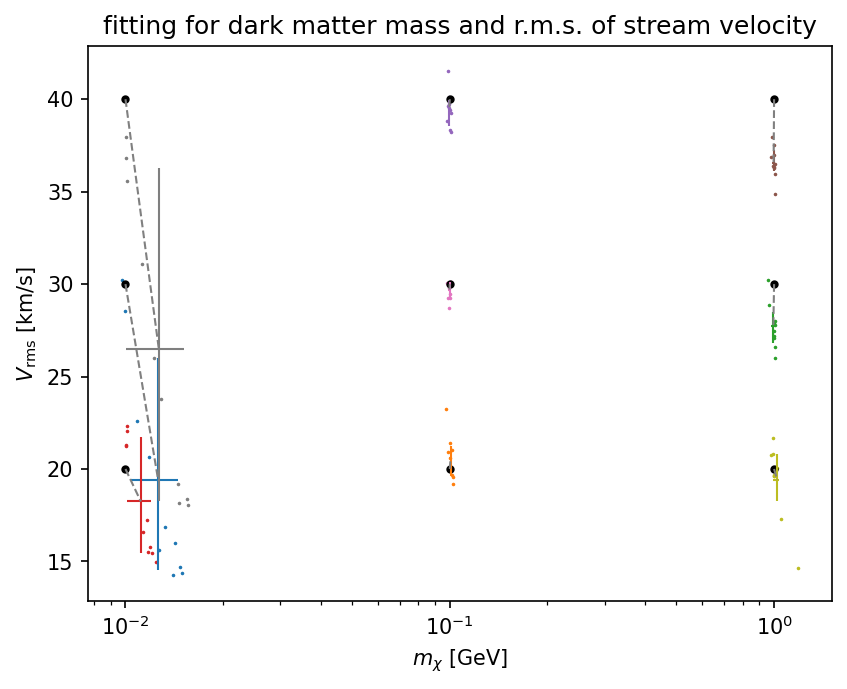

In [4]:
plt.figure(dpi=150)
N_point = 0
for filename in os.listdir("."):
    if filename[-4:] == ".npy":
        data = np.load(filename, mmap_mode='r')
        m_chi_averaged = np.average(data.T[0])
        V_rms_averaged = np.average(data.T[1])
        m_chi_real = float(filename.split('-')[0][5:])
        V_rms_real = float(filename.split('-')[1][5:-4])
        # plt.scatter(data.T[0], data.T[1]/1000, s=1, label=r"N={}, $m_\chi$={}GeV, $Vrms$={}km/s".format(data.shape[0], m_chi_real, int(V_rms_real/1000)))
        print(f"{data.shape[0]} points; "+f"m,V=({m_chi_real}, {m_chi_averaged}), "+f"({int(V_rms_real)}, {V_rms_averaged:.2f})")
        plt.scatter(data.T[0], data.T[1]/1000, s=0.5)
        plt.scatter(m_chi_real, V_rms_real/1000, marker=".", c='k')
        # plt.scatter(m_chi_averaged, V_rms_averaged/1000, marker="v", c='g')
        xerr = np.percentile(data.T[0], [15.9,84.1])
        yerr = np.percentile(data.T[1], [15.9,84.1])
        xerr = abs(xerr-m_chi_averaged)
        yerr = abs(yerr-V_rms_averaged)
        # xerr = np.std(data.T[0])
        # yerr = np.std(data.T[1])
        # print("xerr =", xerr, "yerr =", yerr)
        plt.errorbar(m_chi_averaged, V_rms_averaged/1000, xerr=np.array([xerr]).T, yerr=np.array([yerr]).T/1000, linewidth=1)
        plt.plot([m_chi_real, m_chi_averaged], [V_rms_real/1000, V_rms_averaged/1000], linewidth=1, linestyle='--', c='grey')
        N_point += 1
# plt.colorbar()
# plt.xlim(0, 0.15)
# plt.ylim(20,35)
plt.title("fitting for dark matter mass and r.m.s. of stream velocity")
plt.xlabel(r"$m_{\chi}$ [GeV]")
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(r"$V_{\rm rms}$ [km/s]")
# plt.legend()
plt.savefig(f"400Vrms_{N_point}P_fitting_log-diff_step0.2.png")
plt.show()

In [6]:
def compare(m_list, v_list):
    plt.figure(dpi=150)
    for m_chi in m_list:
        for V_rms in v_list:
            z, dTb, m, V = average_dTb(m_chi=m_chi, V_rms=V_rms, more_random_v_streams=200, cores=1, verbose=False)
            # print('dTb =', dTb)
            plt.plot(z, dTb, label=f"{m} GeV, {V} m/s")
    # plt.xlim(0,300)
    # plt.ylim()
    plt.legend()
    plt.show()

1 CPU working...
It costs 0.03 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.03 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.03 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.03 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------


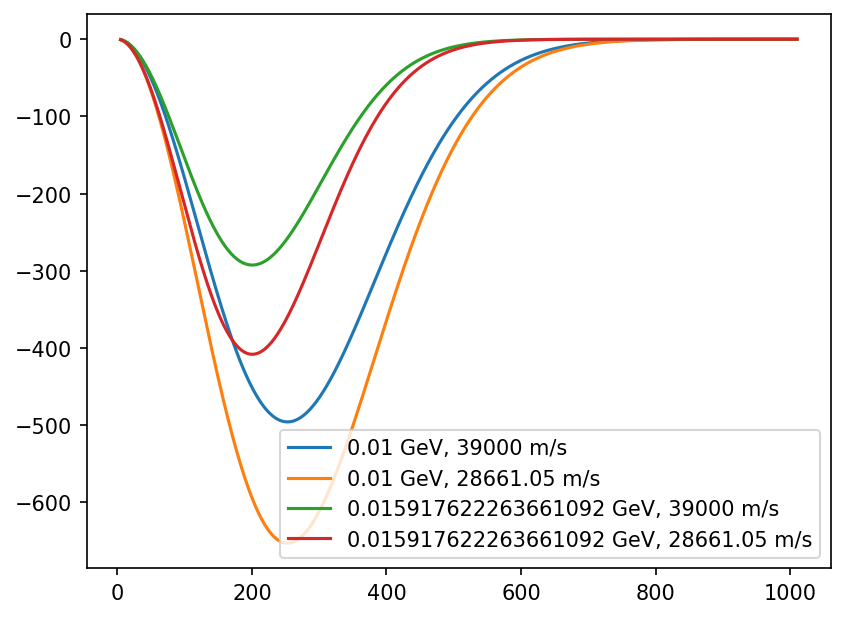

In [7]:
compare((0.01, 0.015917622263661092), (39000, 28661.05))

1 CPU working...
It costs 0.03 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.03 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.03 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.03 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------


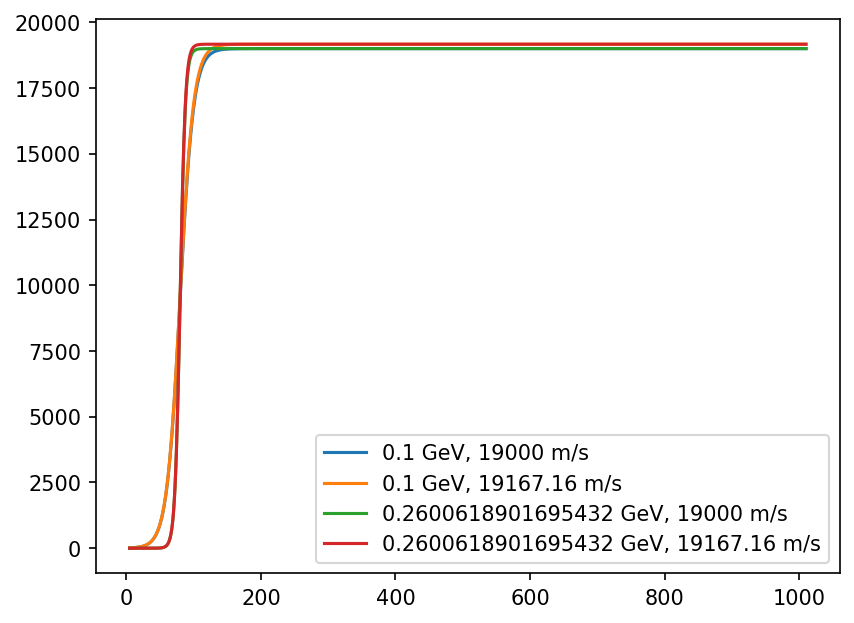

In [ ]:
compare((0.1, 0.2600618901695432), (19000, 19167.16))

1 CPU working...
It costs 0.22 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.32 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.22 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.08 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------


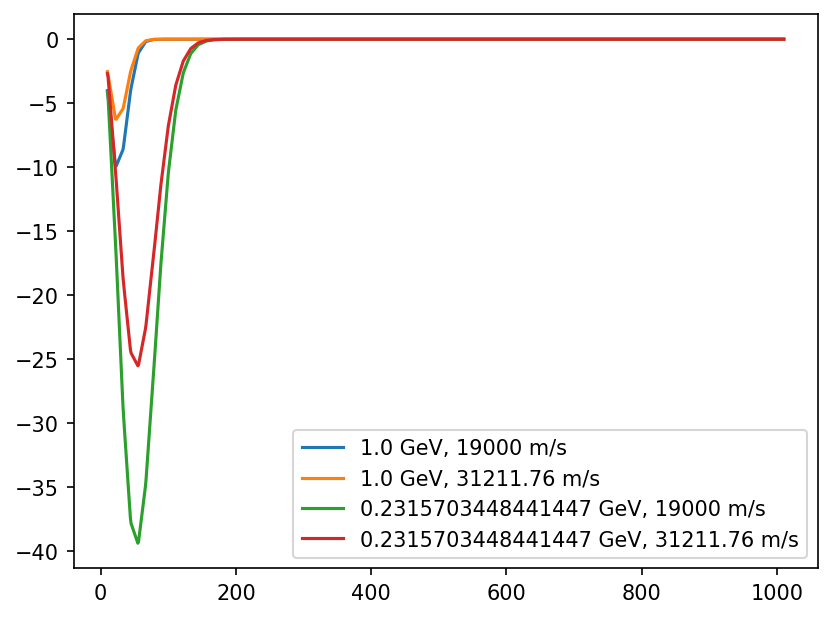

In [ ]:
compare((1.0, 0.2315703448441447), (19000, 31211.76))

1 CPU working...
It costs 0.26 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).


---------------------------------------------
1 CPU working...
It costs 0.28 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.52 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------
1 CPU working...
It costs 0.55 seconds to calculate dTb of 200 different initial_v_streams by 1 CPU(s).
---------------------------------------------


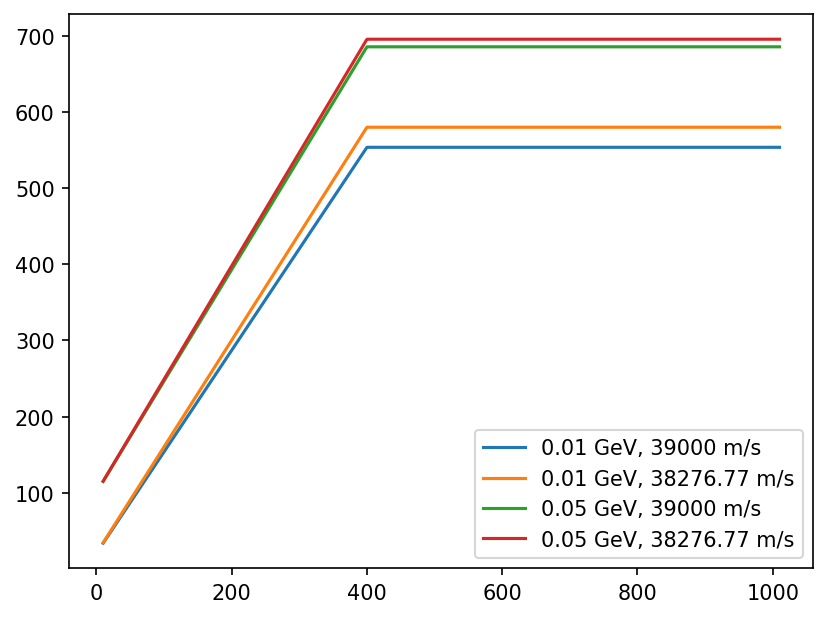

In [ ]:
compare((0.01, 0.05), (39000, 38276.77))

In [4]:
!pwd
!rm -r average_dTb/
!rm m_chi*.npy

/home/bxia34/ares
